# Implementation of standard methods

In [1]:
# standard libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time
%load_ext autoreload
%autoreload 2

# own functions
import proj1_helpers as P1H
import dataprocessing as DP
import implementations as ME
import cross_validation as CV


#constants
train_path = 'train.csv'
test_path = 'test.csv'

#### Importing data 

In [8]:
y, x, ids = P1H.load_csv_data(train_path, sub_sample=False)

#### Normalizing data

In [9]:
nr_x = DP.normalize(x)

### Least Squares

In [4]:
k_folds = 5

avg_loss, losses, avg_acc, pred_acc_percents = CV.cross_validation(ME.least_squares, y, nr_x, k_folds)

print("Average error in percentage in least squares:", avg_acc)
print(avg_loss)

Average error in percentage in least squares: 0.2476
0.325488216292


### Least Squares GD

#### Finding optimal Gamma for LSGD

In [5]:
initial_w_GD = np.zeros((nr_x.shape[1]))#np.zeros((nr_x.shape[1], 1))
max_iters_GD = 1500

gammas_LSGD= np.linspace(0.46,0.467,15)

loss_LSGD_all=[]

for gamma_LSGD in gammas_LSGD:
    
    w_LSDG, loss_LSGD = ME.least_squares_GD(y, nr_x, initial_w_GD,max_iters_GD, gamma_LSGD)
    loss_LSGD_all.append(loss_LSGD)
    
index_of_best_gamma_LSGD = np.argmin(loss_LSGD_all)
best_gamma_LSGD = gammas_LSGD[index_of_best_gamma_LSGD]

#### Plotting results

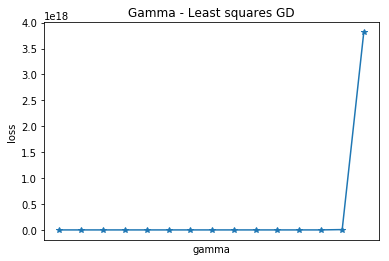

Best value of gamma: 0.4625


In [6]:
plt.semilogx(gammas_LSGD, loss_LSGD_all,'*-',)  
plt.title('Gamma - Least squares GD')
plt.ylabel('loss')
plt.xlabel('gamma')
plt.show()

print("Best value of gamma:", best_gamma_LSGD)

#### Running LSGD with cross validation

In [7]:
initial_w_GD = np.zeros((nr_x.shape[1]))
gamma_GD = 0.4625
max_iters_GD = 1500
k_folds = 5

avg_loss, losses, avg_acc, pred_acc_percents = CV.cross_validation(ME.least_squares_GD, y, nr_x, k_folds, initial_w_GD, max_iters_GD, gamma_GD)

print("Error in percentage in least squares GD with gamma", gamma_GD, "and", max_iters_GD, "iterations:", avg_acc)
print(avg_loss)

Error in percentage in least squares GD with gamma 0.4625 and 1500 iterations: 0.2564
0.337774429798


### Least Squares SGD

#### Finding optimal Gamma for LSSGD

In [8]:
initial_w_SGD = np.zeros((nr_x.shape[1]))
max_iters_SGD = 5000

gammas_LSSGD=np.logspace(-3,-1,30)

loss_LSSGD_all=[]

for gamma_LSSGD in gammas_LSSGD:
    
    w_LSSDG, loss_LSSGD = ME.least_squares_SGD(y, nr_x, initial_w_SGD, max_iters_SGD, gamma_LSSGD)
    loss_LSSGD_all.append(loss_LSSGD)
    
index_of_best_gamma_LSSGD = np.argmin(loss_LSSGD_all)
best_gamma_LSSGD = gammas_LSSGD[index_of_best_gamma_LSSGD]

#### Plotting results

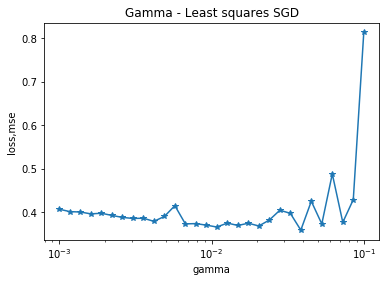

Best value of gamma: 0.0385662042116


In [9]:
plt.semilogx(gammas_LSSGD, loss_LSSGD_all,'*-',)  
plt.title('Gamma - Least squares SGD')
plt.ylabel('loss,mse')
plt.xlabel('gamma')
plt.show()

print("Best value of gamma:", best_gamma_LSSGD)

#### Running LSSGD with cross validation

In [10]:
initial_w_SGD = np.zeros((nr_x.shape[1]))
gamma_SGD = best_gamma_LSSGD
max_iters_SGD = 5000
k_folds = 5

avg_loss, losses, avg_acc, pred_acc_percents = CV.cross_validation(ME.least_squares_SGD, y, nr_x, k_folds, initial_w_SGD, max_iters_SGD, gamma_SGD)
print(avg_loss)
print("Error in percentage in least squares GD with gamma", gamma_SGD, "and", max_iters_SGD, "iterations:", avg_acc)

0.378866531712
Error in percentage in least squares GD with gamma 0.0385662042116 and 5000 iterations: 0.28124000000000005


### Ridge Regression

#### Finding optimal Lambda for Ridge Regression

In [11]:
lambdas_RR=np.logspace(-20,2,20)
accuracy_RR_all=[]
loss_RR_all=[]

for lambda_RR in lambdas_RR:
    
    w_RR, loss_RR = ME.ridge_regression(y, nr_x, lambda_RR)
    loss_RR_all.append(loss_RR)
    
index_of_best_lambda_RR = np.argmin(loss_RR_all)
best_lambda_RR = lambdas_RR[index_of_best_lambda_RR]

#### Plotting results

#### Running Ridge Regression with cross validation

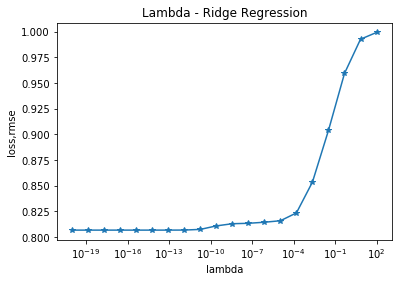

lowest value of lambda: 1e-20
As expected, with lambda=0, we get the same results as in least squares


In [12]:
plt.semilogx(lambdas_RR, loss_RR_all,'*-',)  
plt.title('Lambda - Ridge Regression')
plt.ylabel('loss,rmse')
plt.xlabel('lambda')
plt.show()

print("lowest value of lambda:", best_lambda_RR)
print("As expected, with lambda=0, we get the same results as in least squares")

#### Running RR with cross validation

In [13]:
k_folds = 5
#selects a "small enough" lambda
lambda_RR=1e-10

avg_loss, losses, avg_acc, pred_acc_percents = CV.cross_validation(ME.ridge_regression, y, nr_x, k_folds, lambda_RR)

print("Error in percentage in ridge regression with lambda", lambda_RR, ":", avg_acc)


Error in percentage in ridge regression with lambda 1e-10 : 0.24779999999999996


### Logistic regression

#### Preparing dataset for Logistic Regression

In [10]:
#Adding a constant (intercept) in the x, and set y to 1/0 (instead of 1/-1)

x_LR = np.c_[np.ones((nr_x.shape[0], 1)), nr_x]

y_LR = DP.classify(y)

#### Finding optimal Gamma for Logistic Regression

In [11]:
initial_w_LR = np.zeros((x_LR.shape[1], 1))
max_iters_LR = 500
k_folds = 5

gammas_LR = np.logspace(-3.6,-3,30)

loss_LR_all = []

for gamma_LR in gammas_LR:
    
    w_LR, loss_LR = ME.logistic_regression(y_LR, x_LR, initial_w_LR, max_iters_LR, gamma_LR)
    loss_LR_all.append(loss_LR)
    
index_of_best_gamma_LR = np.argmin(loss_LR_all)
best_gamma_LR = gammas_LR[index_of_best_gamma_LR]

C:\Users\Thomas\Desktop\TESTTEST\dataprocessing.py:25: RuntimeWarning: overflow encountered in exp
  a=np.exp(t)/(1+np.exp(t))
C:\Users\Thomas\Desktop\TESTTEST\dataprocessing.py:25: RuntimeWarning: invalid value encountered in true_divide
  a=np.exp(t)/(1+np.exp(t))


#### Plotting results

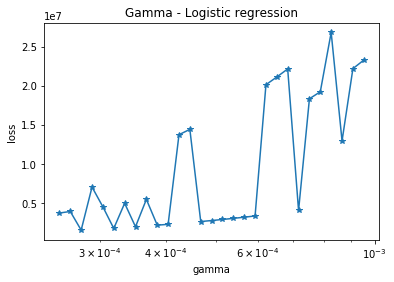

Best value of gamma: 0.001


In [12]:
plt.semilogx(gammas_LR, loss_LR_all,'*-',)  
plt.title('Gamma - Logistic regression')
plt.ylabel('loss')
plt.xlabel('gamma')
plt.show()

print("Best value of gamma:", best_gamma_LR)

#### Running Logistic Regression with cross validation

In [14]:
initial_w_LR = np.zeros((x_LR.shape[1], 1))
max_iters_LR = 500
gamma_LR = best_gamma_LR
k_folds = 5

avg_loss, losses, avg_acc, pred_acc_percents = CV.cross_validation(ME.logistic_regression, y_LR, x_LR, k_folds, 
                                                                   initial_w_LR, max_iters_LR, gamma_LR)

print("Error in percentage using Logistic regression with gamma", gamma_LR, "and", max_iters_LR, "iterations:", avg_acc)

Error in percentage using Logistic regression with gamma 0.001 and 500 iterations: 0.42707759999999995


### Regularized Logistic regression

#### Preparing dataset for Regularized Logistic Regression

In [18]:
#Adding a constant (intercept) in the x, and set y to 1/0 (instead of 1/-1)

x_RLR = np.c_[np.ones((nr_x.shape[0], 1)), nr_x]

y_RLR = DP.classify(y)

#### Finding optimal value for Gamma

In [19]:
initial_w_RLR = np.zeros((x_RLR.shape[1], 1))
lambda_RLR = 1e-5
max_iters_RLR = 1000

gammas_RLR = np.logspace(-3.6,-3.35,30)

loss_RLR_all = []

for gamma_RLR in gammas_RLR:
    
    w_RLR, loss_RLR = ME.reg_logistic_regression(y_RLR, x_RLR, lambda_RLR, initial_w_RLR,max_iters_RLR, gamma_RLR)
    loss_RLR_all.append(loss_RLR)
    
index_of_best_gamma_RLR = np.argmin(loss_RLR_all)
best_gamma_RLR = gammas_RLR[index_of_best_gamma_RLR]

#### Ploting optimal value for gamma

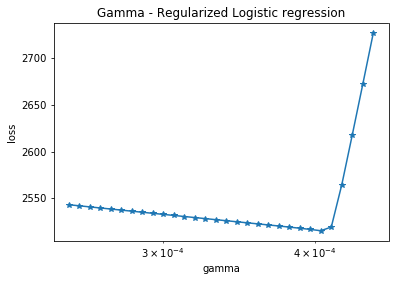

Best value of gamma: 0.000404479533821


In [20]:
plt.semilogx(gammas_RLR, loss_RLR_all,'*-',)  
plt.title('Gamma - Regularized Logistic regression')
plt.ylabel('loss')
plt.xlabel('gamma')
plt.show()

print("Best value of gamma:", best_gamma_RLR)

#### Finding optimal value for Lambda

In [21]:
max_iters_RLR = 1000
gamma_RLR = 0.000404479533821 #0.000385662042116
initial_w_RLR = np.zeros((x_RLR.shape[1], 1))

lambdas_RLR=np.logspace(-5,3,30)


loss_RLR_all=[]

for lambda_RLR in lambdas_RLR:
    
    w_RLR, loss_RLR = ME.reg_logistic_regression(y_RLR, x_RLR, lambda_RLR, initial_w_RLR, max_iters_RLR, gamma_RLR)
    loss_RLR_all.append(loss_RLR)
    
index_of_best_lambda_RLR = np.argmin(loss_RLR_all)
best_lambda_RLR = lambdas_RLR[index_of_best_lambda_RLR]

#### Plotting optimal value for Lambda

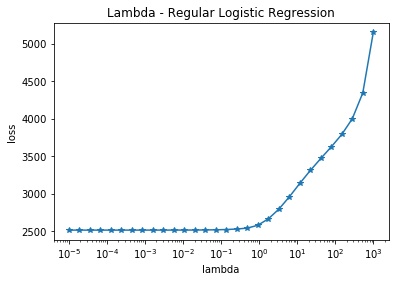

Best value of lambda: 1e-05


In [22]:
plt.semilogx(lambdas_RLR, loss_RLR_all, '-*')
plt.title('Lambda - Regular Logistic Regression')
plt.ylabel('loss')
plt.xlabel('lambda')
plt.show()

print("Best value of lambda:", best_lambda_RLR)

#### Running Regularized Logistic Regression with cross validation


In [23]:
initial_w_RLR = np.zeros((x_RLR.shape[1], 1))
max_iters_RLR = 1000
gamma_RLR =0.000404479533821
lambda_RLR = 1e-05
k_folds = 5

avg_loss, losses, avg_acc, pred_acc_percents = CV.cross_validation(ME.reg_logistic_regression,
                                                                   y_RLR, x_RLR, k_folds, lambda_RLR,
                                                                   initial_w_RLR, max_iters_RLR, gamma_RLR)

print("Error in percentage in regularized logistic regression with gamma", gamma_RLR, ", lambda", lambda_RLR,
      "and", max_iters_RLR, "iterations:", avg_acc)

Error in percentage in regularized logistic regression with gamma 0.000404479533821 , lambda 1e-05 and 1000 iterations: 0.25628
